<h1><center> Neural Network</center></h1>
<h3><center> Bin Yu, Nuoya Rezsonya, Yejur Singh Kunwar, Iram Bakhtiar</center></h3>

# Contents

1. [Abstract](#Abstract)
2. [Introduction](#Introduction)
3. [Background](#Background)
4. [Methods](#Methods)
5. [Results](#Results)
6. [Conclusion](#Conclusion)
7. [References](#References)
8. [Appendix: Code](#Appendix)

# Abstract




[Back to Contents](#Contents)

# Introduction

Deep learning or Neural Network is one of the hottest topic in technology world. If you know big data, you probably already heard this topic. With computational loads and expenses getting higher, Neural Network has become the popular machine learning tool. 

Neural network is a class of models within the general machine learning literature. It is inspired by biological neural networks, huamn brain's architecture. Neurons in a neural newtork use an initial input, together with creates weighted values and bias values based on the input as a total input, and then using matrix multiplication along with activation functions to give a new value as an output. It is similar to human brain. 

Neural Network is composed of several layers, mapping inputs to outputs and finding the correlations between them. Those layers are made of nodes which are the places where the computations happen. Each node combines input from the data with a set of coefficients, or weights, that either promote or demote that input, therefore we have different weights on the input values. These input-weight products are summed and then the sum is passed through a node’s so-called activation function, to determine which and what should be carrying further in this networkd to create the output. If anything passes through, the neuron has been “activated.” The following is a work flow that shows how neural network works. [2]

<center><img src='NN_plot.png'></center>

The data in this project comes from the large hadron collider (LHC) at CERN to classify the relatively newly found Higgs Boson as it either tau tau decays or the measurement was just background. Given the paper Searching for Exotic Particles in High-Energy Physics with Deep Learning[3], we have established a replica Neural Network with the paper’s architecture using Tensorflow. We have also trained on this data and answered the following questions:

- How close we get to the original results?


- Based on the class notes and discussion suggest improvements to the procedure"

        - What are standard practices now versus when this paper was written?  
        
        - What kind of improvements do they provide?
        
        - How would you quantify if your result duplicated the paper’s?


[Back to Contents](#Contents)

# Background


## Data Set Information:

The data has been produced using Monte Carlo simulations. The first 21 features (columns 2-22) are kinematic properties measured by the particle detectors in the accelerator. The last seven features are functions of the first 21 features; these are high-level features derived by physicists to help discriminate between the two classes. There is an interest in using deep learning methods to obviate the need for physicists to manually develop such features. Benchmark results using Bayesian Decision Trees from a standard physics package and 5-layer neural networks are presented in the original paper. The last 500,000 examples are used as a test set.


## Attribute Information:

The first column is the class label (1 for signal, 0 for background), followed by the 28 features (21 low-level features then 7 high-level features): lepton pT, lepton eta, lepton phi, missing energy magnitude, missing energy phi, jet 1 pt, jet 1 eta, jet 1 phi, jet 1 b-tag, jet 2 pt, jet 2 eta, jet 2 phi, jet 2 b-tag, jet 3 pt, jet 3 eta, jet 3 phi, jet 3 b-tag, jet 4 pt, jet 4 eta, jet 4 phi, jet 4 b-tag, m_jj, m_jjj, m_lv, m_jlv, m_bb, m_wbb, m_wwbb. For more detailed information about each feature see the original paper.


[Back to Contents](#Contents)

# Methods

In order to find an optimal neural network for the data we have used, we will build our neural network architecture with different processes meaning one part of the network at a time. There are a variety of parameters we have been altering. They are hidden layers, nodes, activation function, batch size, kernel initializion functions and optimization functions. 

###  Hidden Layers and Nodes
Hidden layers receive input from a previous layer (if it is the first hidden layer, input would be the input layer, if not it would be the previous hidden layer) and outputs until the next layer (whether it be the next hidden layer or the final output layer). Hidden layers are made up of neurons/nodes that receive input values from a bias value and all of the previous layer's neurons that are multiplied by their associated weights. These neurons take this matrix math and apply an activation function to yield an output for each of the neurons at the next layer. The more hidden layers added to the model can give the model more power but this comes at the cost of computational time by increasing the amount of math needed to compute during each epoch.

### Activation Functions
Activation functions are mathematical functions that map an input value into an output value. The variation in each activation function allows the mapping of outputs to different values to accomplish different results. This allows for the contruction of both linear and non-linear models. For our purposes, we will only focus on the non-linear functions.
- Sigmoid Function
- Tanh Function 
- ReLU Function
- ELU/SELU Function

### Kernel Initialization Functions
### Optimization Functions(learning rate etc)
### Batch Size


[Back to Contents](#Contents)

# Results



[Back to Contents](#Contents)

# Conclusion



[Back to Contents](#Contents)

# References

[1] Baldi, P., P. Sadowski, and D. Whiteson. “Searching for Exotic Particles in High-energy Physics with Deep Learning.” Nature Communications 5 (July 2, 2014)

[Back to Contents](#Contents)

# Appendix: Codes




[Back to Contents](#Contents)

In [ ]:
#!pip install ml_metrics 
#!pip install pymc 
#!pip install pymc3
# !pip install tensorflow --upgrade --trusted-host pypi.org --trusted-host files.pythonhosted.org

### Import Packages

In [1]:
import tensorflow as tf;print(tf.__version__)
from tensorflow.keras import layers
from sklearn import datasets
import pandas as pd ;print(pd.__version__)
import numpy as np;print(np.__version__)
from sklearn.model_selection import train_test_split
from time import time
from tensorflow.keras.callbacks import TensorBoard


import csv
import seaborn as sns;
import matplotlib.pyplot as plt


import warnings
warnings.simplefilter('ignore')

%matplotlib inline
tb = TensorBoard(log_dir=f"logs\\{time()}")


1.14.0
0.24.2
1.16.2


## Import data and exploring
* Please download the data from https://archive.ics.uci.edu/ml/datasets/HIGGS and save it into your local folder as it is big.


In [2]:
# df_HIGGS = pd.read_csv("D:\MyWork\SMU\MSDS7333\HIGGS.csv") # Bin Yu's path
df_HIGGS = pd.read_csv('data\\HIGGS.csv', header=None, low_memory=False) # Yejur's path

In [3]:
# Populating with columns and feature labels
cols=['class label','lepton pT', 'lepton eta', 'lepton phi', 'missing energy magnitude'
                  , 'missing energy phi', 'jet 1 pt', 'jet 1 eta', 'jet 1 phi', 'jet 1 b-tag', 'jet 2 pt'
                  , 'jet 2 eta', 'jet 2 phi', 'jet 2 b-tag', 'jet 3 pt', 'jet 3 eta', 'jet 3 phi', 'jet 3 b-tag'
                  , 'jet 4 pt', 'jet 4 eta', 'jet 4 phi', 'jet 4 b-tag', 'm_jj', 'm_jjj', 'm_lv', 'm_jlv'
                  , 'm_bb', 'm_wbb', 'm_wwbb']
features=['lepton pT', 'lepton eta', 'lepton phi', 'missing energy magnitude'
                  , 'missing energy phi', 'jet 1 pt', 'jet 1 eta', 'jet 1 phi', 'jet 1 b-tag', 'jet 2 pt'
                  , 'jet 2 eta', 'jet 2 phi', 'jet 2 b-tag', 'jet 3 pt', 'jet 3 eta', 'jet 3 phi', 'jet 3 b-tag'
                  , 'jet 4 pt', 'jet 4 eta', 'jet 4 phi', 'jet 4 b-tag', 'm_jj', 'm_jjj', 'm_lv', 'm_jlv'
                  , 'm_bb', 'm_wbb', 'm_wwbb']
df_HIGGS.columns=cols

In [4]:
df_HIGGS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000000 entries, 0 to 10999999
Data columns (total 29 columns):
class label                 float64
lepton pT                   float64
lepton eta                  float64
lepton phi                  float64
missing energy magnitude    float64
missing energy phi          float64
jet 1 pt                    float64
jet 1 eta                   float64
jet 1 phi                   float64
jet 1 b-tag                 float64
jet 2 pt                    float64
jet 2 eta                   float64
jet 2 phi                   float64
jet 2 b-tag                 float64
jet 3 pt                    float64
jet 3 eta                   float64
jet 3 phi                   float64
jet 3 b-tag                 float64
jet 4 pt                    float64
jet 4 eta                   float64
jet 4 phi                   float64
jet 4 b-tag                 float64
m_jj                        float64
m_jjj                       float64
m_lv                 

In [5]:
df_HIGGS.head()

,class label,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 phi,jet 1 b-tag,...,jet 4 eta,jet 4 phi,jet 4 b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [6]:
df_HIGGS.isna().sum()

class label                 0
lepton pT                   0
lepton eta                  0
lepton phi                  0
missing energy magnitude    0
missing energy phi          0
jet 1 pt                    0
jet 1 eta                   0
jet 1 phi                   0
jet 1 b-tag                 0
jet 2 pt                    0
jet 2 eta                   0
jet 2 phi                   0
jet 2 b-tag                 0
jet 3 pt                    0
jet 3 eta                   0
jet 3 phi                   0
jet 3 b-tag                 0
jet 4 pt                    0
jet 4 eta                   0
jet 4 phi                   0
jet 4 b-tag                 0
m_jj                        0
m_jjj                       0
m_lv                        0
m_jlv                       0
m_bb                        0
m_wbb                       0
m_wwbb                      0
dtype: int64

In [7]:
df_HIGGS['class label'].value_counts()

1.0    5829123
0.0    5170877
Name: class label, dtype: int64

#### FOR TESTING CODE WITH SHORT SAMPLE WHICH SHOULD BE BALANCED ENOUGH

In [9]:
short_df_HIGGS = df_HIGGS[0:5000]  # only first 5K records both with equal number of classes (need to verify)
short_df_HIGGS['class label'].value_counts()

1.0    2670
0.0    2330
Name: class label, dtype: int64

### Features and Targets

In [10]:
# y= np.array(df_HIGGS['class label'])

# X =np.array( df_HIGGS[features])


y= np.array(short_df_HIGGS['class label'])

X =np.array(short_df_HIGGS[features])


## Scale Data

Neural Networks are especially sensitive do data scaling.  Nearly all the activation functions saturate at (0,1) or (-1,1)

In [11]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(X)

scaled_train_df = pd.DataFrame(scaled_train, columns=features)

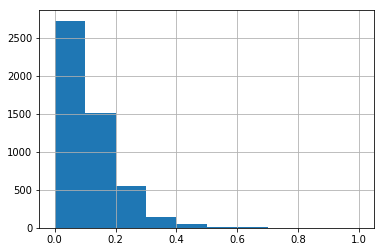

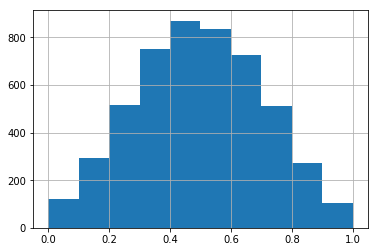

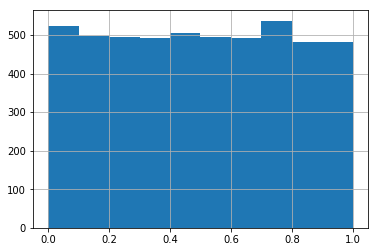

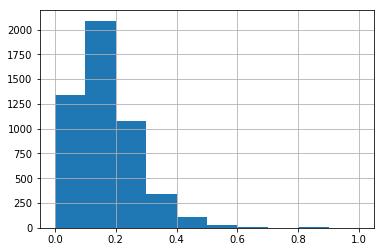

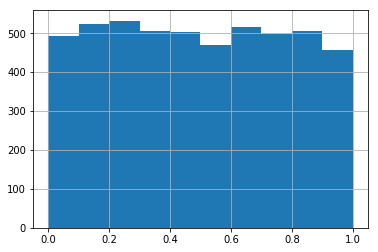

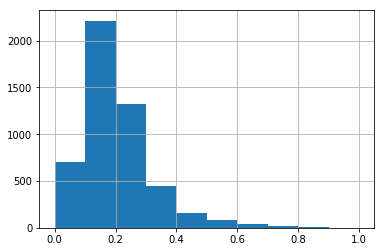

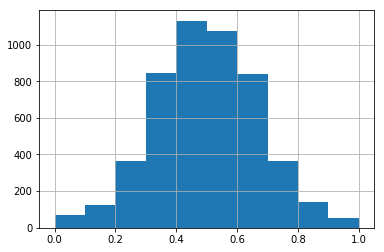

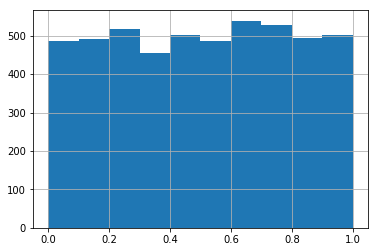

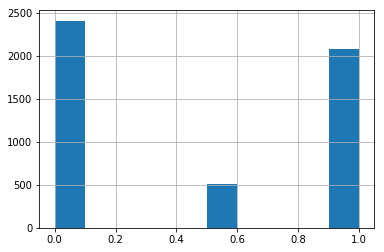

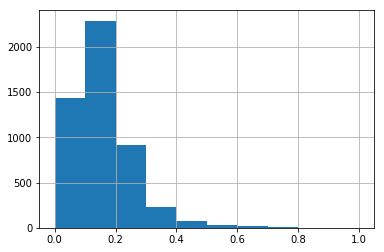

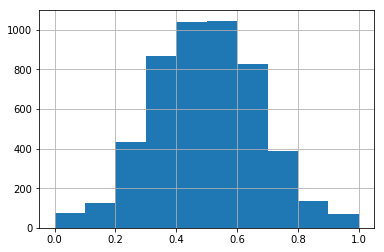

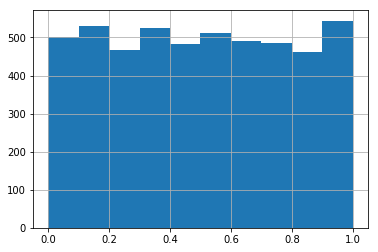

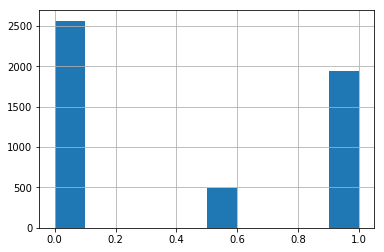

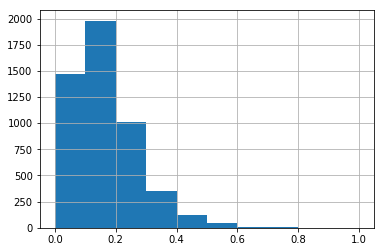

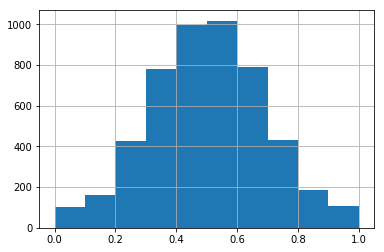

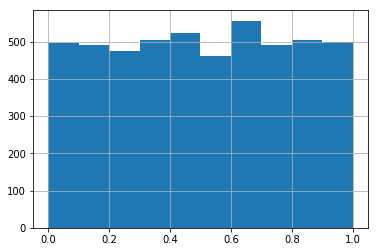

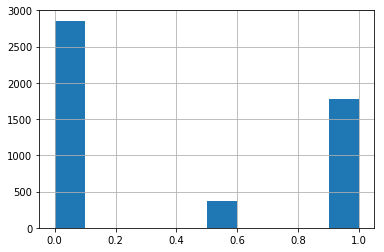

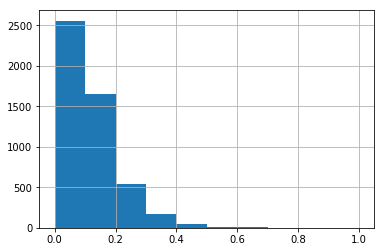

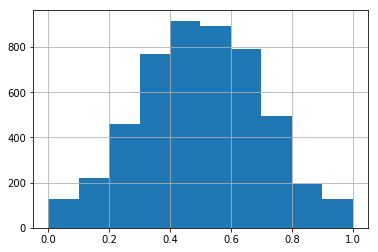

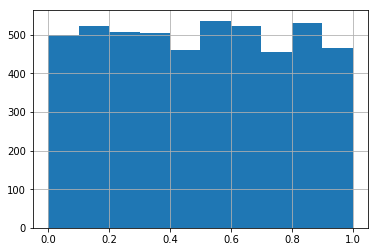

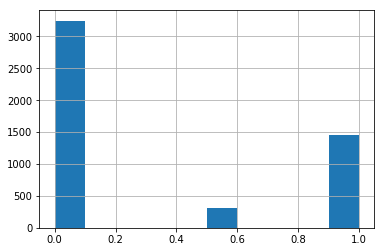

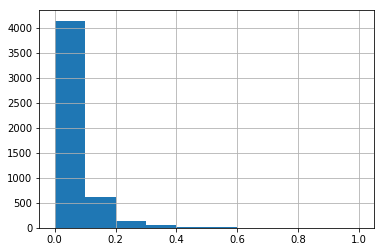

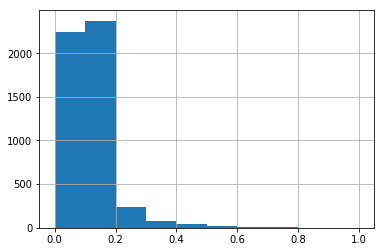

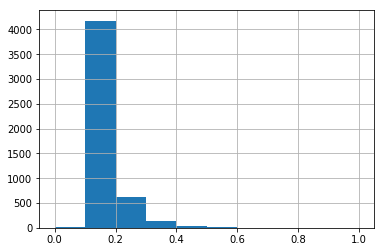

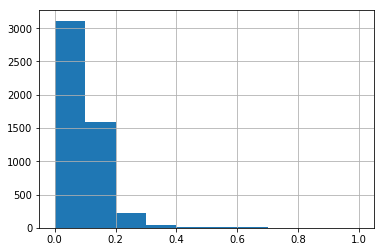

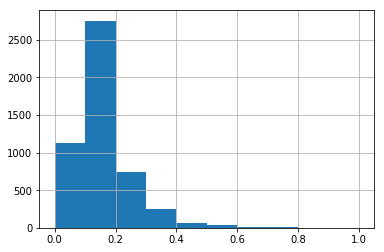

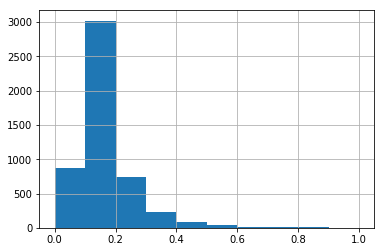

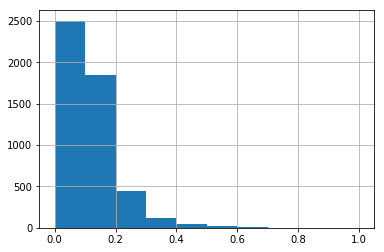

In [13]:

for i in scaled_train_df:
    scaled_train_df[i].hist()
    plt.show()

# # plot to look at distribution accross features
# f, axes = plt.subplots(len(scaled_train_df.columns), 4, figsize=(20, 15), sharex=False)
# for i in scaled_train_df:
#     sns.distplot( scaled_train_df[i] , color="skyblue")#, ax=axes[0, 0])
    

## Model

- The Sequential() class is used to build a model. Then we add layers after layer to model in respective orders. This is using Tensorflow package and Keras API in tensorflow. 

In [14]:
# Calling class Sequential(), adding layers with sigmoid activation
model = tf.keras.Sequential()
model.add(layers.Dense(100, activation='sigmoid'))
model.add(layers.Dense(100, activation='sigmoid'))
model.add(layers.Dense(3 ,activation='sigmoid'),)

W0720 18:46:50.697000  1828 deprecation.py:506] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## Compile Model

- Compiles model and adds solver or optimizer, also calculates loss metrics

In [15]:
# Model compilation to add solver and get loss metrics
model.compile(optimizer=tf.train.GradientDescentOptimizer(0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

## Fit the Model

- Train, Fit, and Validate model

In [16]:
# cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1776)

In [18]:
model_1 = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10, batch_size=4, callbacks=[tb])

Train on 4000 samples, validate on 1000 samples
Epoch 1/10
4000/4000 [==============================] - 1s 266us/sample - loss: 0.6910 - acc: 0.5307 - val_loss: 0.6894 - val_acc: 0.5470
Epoch 2/10
4000/4000 [==============================] - 1s 268us/sample - loss: 0.6907 - acc: 0.5303 - val_loss: 0.6884 - val_acc: 0.5470
Epoch 3/10
4000/4000 [==============================] - 1s 275us/sample - loss: 0.6908 - acc: 0.5310 - val_loss: 0.6881 - val_acc: 0.5470
Epoch 4/10
4000/4000 [==============================] - 1s 274us/sample - loss: 0.6902 - acc: 0.5320 - val_loss: 0.6908 - val_acc: 0.5510
Epoch 5/10
4000/4000 [==============================] - 1s 275us/sample - loss: 0.6902 - acc: 0.5318 - val_loss: 0.6890 - val_acc: 0.5470
Epoch 6/10
4000/4000 [==============================] - 1s 276us/sample - loss: 0.6903 - acc: 0.5305 - val_loss: 0.6880 - val_acc: 0.5470
Epoch 7/10
4000/4000 [==============================] - 1s 272us/sample - loss: 0.6901 - acc: 0.5315 - val_loss: 0.6882 - va

In [32]:
# np.argmax(model.predict(X_test),axis=1)

In [34]:
# y_test

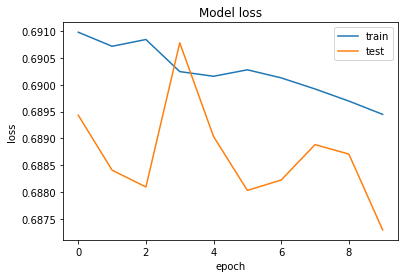

In [20]:
plt.plot(model_1.history['loss'], label='train')
plt.plot(model_1.history['val_loss'], label='test')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

# Visualizing in Tensorboard

Tensorboard allows you to look at your training curves in real time.  All we need to do here is add a "callback" that is executed every epoch end.  Tensorboard writes a summary of the model output.  If you manually build a neural network, you need to add tf.summary operations.

To run tensorboard type

`tensorboard --logdir logs`

Then go to localhost:6006 in your web browser

In [21]:
from time import time
from tensorflow.keras.callbacks import TensorBoard
tb = TensorBoard(log_dir=f"logs\\{time()}")

In [25]:
model.compile(optimizer=tf.train.GradientDescentOptimizer(0.001),
              loss='mean_squared_error',
              metrics=['mean_squared_error', 'accuracy'])

In [26]:
tp = [] # the true positive rate list
fp = [] # the false positive rate list
total = len(fp)
writer = tf.summary.FileWriter("/tmp/tensorboard_roc")
for idx in range(total):
    summt = tf.Summary()
    summt.value.add(tag="roc", simple_value = tp[idx])
    writer.add_summary (summt, tp[idx] * 100) #act as global_step
    writer.flush ()



Epoch 1/10
5000/5000 - 0s - loss: 0.3441 - mean_squared_error: 0.3441 - acc: 0.2914
Epoch 2/10
5000/5000 - 0s - loss: 0.3441 - mean_squared_error: 0.3441 - acc: 0.3474
Epoch 3/10
5000/5000 - 0s - loss: 0.3441 - mean_squared_error: 0.3441 - acc: 0.3942
Epoch 4/10
5000/5000 - 0s - loss: 0.3441 - mean_squared_error: 0.3441 - acc: 0.4292
Epoch 5/10
5000/5000 - 0s - loss: 0.3441 - mean_squared_error: 0.3441 - acc: 0.4492
Epoch 6/10
5000/5000 - 0s - loss: 0.3441 - mean_squared_error: 0.3441 - acc: 0.4672
Epoch 7/10
5000/5000 - 0s - loss: 0.3441 - mean_squared_error: 0.3441 - acc: 0.4782
Epoch 8/10
5000/5000 - 0s - loss: 0.3441 - mean_squared_error: 0.3441 - acc: 0.4864
Epoch 9/10
5000/5000 - 0s - loss: 0.3441 - mean_squared_error: 0.3441 - acc: 0.4916
Epoch 10/10
5000/5000 - 0s - loss: 0.3441 - mean_squared_error: 0.3441 - acc: 0.4956


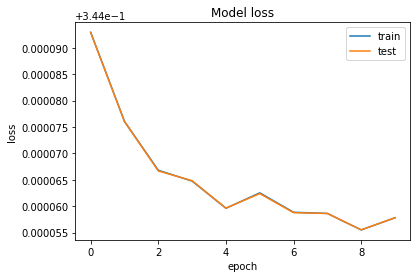

In [27]:
history = model.fit(scaled_train_df.values, y, epochs=10, batch_size=20, callbacks=[tb], verbose=2)
## plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['mean_squared_error'], label='test')
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [ ]:
sess = tf.compat.v1.Session()
sess.close()

In [ ]:
!tensorboard --logdir /tmp/tensorboard_roc 

# tensorboard --logdir path/to/logs
##(please use command line to do this)

# End of Case Study #10

[1] https://medium.com/cracking-the-data-science-interview/a-gentle-introduction-to-neural-networks-for-machine-learning-d5f3f8987786

[2] https://skymind.ai/wiki/neural-network#concrete

[3] https://arxiv.org/pdf/1402.4735.pdf